In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/ankitkothari/Documents/gdrivre/UMD/projects_strats/traffic.csv')
data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [6]:
data.shape  

(226278, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [5]:
data['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

### How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [20]:
data['event'].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [21]:
pageviews = data[data['event'] == 'pageview']
pageviews.groupby(['date'], as_index=False)['event'].count()

,date,event
0,2021-08-19,22366
1,2021-08-20,21382
2,2021-08-21,21349
3,2021-08-22,20430
4,2021-08-23,18646
5,2021-08-24,18693
6,2021-08-25,19149


In [25]:
def event_by_date(event):
    event_df = data[data['event'] == event]
    return event_df.groupby(['date'], as_index=False)['event'].count()
    

In [26]:
for event in data['event'].unique():
    print(f'Event: {event}')
    print(event_by_date(event))

Event: click
         date  event
0  2021-08-19   9207
1  2021-08-20   8508
2  2021-08-21   8071
3  2021-08-22   7854
4  2021-08-23   7315
5  2021-08-24   7301
6  2021-08-25   7476
Event: preview
         date  event
0  2021-08-19   3788
1  2021-08-20   4222
2  2021-08-21   4663
3  2021-08-22   4349
4  2021-08-23   3847
5  2021-08-24   3840
6  2021-08-25   3822
Event: pageview
         date  event
0  2021-08-19  22366
1  2021-08-20  21382
2  2021-08-21  21349
3  2021-08-22  20430
4  2021-08-23  18646
5  2021-08-24  18693
6  2021-08-25  19149


### Which countries did the pageviews come from?

In [90]:
pageviews.groupby(['country'], as_index=False)['event'].count()
print(f'The total number of countries is {len(pageviews["country"].unique())}')

The total number of countries is 212


### What was the overall click rate (clicks/pageviews)?

In [94]:
ctr_by_link = data.pivot_table(index='linkid', 
                columns='event', 
                values='country',
                aggfunc='count').reset_index()

ctr_by_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   linkid    3839 non-null   object 
 1   click     2255 non-null   float64
 2   pageview  3837 non-null   float64
 3   preview   495 non-null    float64
dtypes: float64(3), object(1)
memory usage: 120.1+ KB


In [99]:
ctr_by_link = ctr_by_link[(ctr_by_link['pageview'] > 0.0) & (ctr_by_link['click'] > 0.0)]
ctr_by_link = ctr_by_link.drop_duplicates()
ctr_by_link['ctr'] = ctr_by_link['click'] / ctr_by_link['pageview']
ctr_by_link.fillna(0.0, inplace=True)
ctr_by_link.sort_values(by='ctr', ascending=False)
ctr_by_link['ctr'].mean()

0.8099296063938283

In [101]:
ctr_by_link

event,linkid,click,pageview,preview,ctr
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2.0,2.0,0.0,1.000000
6,004b9724-abca-5481-b6e9-6148a7ca00a5,1.0,1.0,0.0,1.000000
9,0063a982-41cd-5629-96d0-e1c4dd72ea11,2.0,3.0,0.0,0.666667
10,006af6a0-1f0d-4b0c-93bf-756af9071c06,8.0,36.0,11.0,0.222222
11,00759b81-3f04-4a61-b934-f8fb3185f4a0,3.0,4.0,1.0,0.750000
...,...,...,...,...,...
3831,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29.0,84.0,21.0,0.345238
3834,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1.0,1.0,0.0,1.000000
3836,fff84c0e-90a1-59d8-9997-adc909d50e16,1.0,1.0,0.0,1.000000
3837,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1.0,2.0,0.0,0.500000


### How does the clickrate distribute across different links?

In [102]:
ctr_by_link['ctr'].describe()

count    2253.000000
mean        0.809930
std         1.958028
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: ctr, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ctr'>

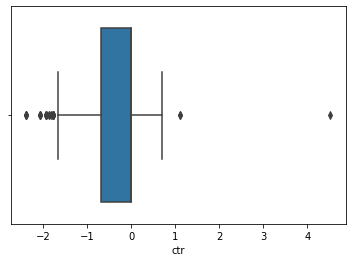

In [104]:
#box plot log of ctr
sns.boxplot(np.log(ctr_by_link['ctr']))


### Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [107]:
ctr_by_link[['click','preview']].corr()

event,click,preview
event,,
click,1.000000,0.988685
preview,0.988685,1.000000


In [108]:
data

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [110]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = ctr_by_link[['preview']]
y = ctr_by_link['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)


0.9228637967348239

In [111]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = data[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.188101,0.010852,0.006472,0.005394
city,0.188101,1.000000,0.088732,0.095431,0.097308
artist,0.010852,0.088732,1.000000,0.901881,0.875746
album,0.006472,0.095431,0.901881,1.000000,0.963166
track,0.005394,0.097308,0.875746,0.963166,1.000000
